In [1]:
from IPython.display import Image

**Mark Raney**
# Exploring National Hockey League Statistics

## Introduction

An emphasis on analytics and data-driven descisions has been an evergrowing theme in nearly every major industry, and sports are no outlier. Though, largely having found a niche with baseball early on, analytics has been slow to reach the front-offices of other major leagues. Hockey, by most accounts, remains in the very early stages of analytics, though not purely due to a difference in culture. Unlike baseball's head-to-head nature, there's far more to be accounted for in a hockey game and at a much greater speed, resulting in well-established trends being more difficult to come accross when analyzing the data coming out of a dataset.

All of this is not to say, however, that there aren't groups of people working to locate trends that highly influence a teams success. Some buzzwords have been established among the hockey analytics community, such as corsi, fenwick, and pdo. Without going too deep, these are measurements derived from simple, easily measured variables (shots, shot blocks, etc.) that are meant to gauge how well a given team controls the play over another. There's yet to be any consensus on the value of these measurements, some believing they're something you can fairly judge a team or a player on, and others believing there's no significant relationship tying them to performance.

The goal of my project is to examine how these measurements affect a teams overall performance. On top of that, this project will also be examining the difference in play-styles of forwards and defensemen to attempt finding how they can be best utilized for a teams success.

## Acquiring the data

For the scope of the project thus far, two primary data sources were used: Sportradar's NHL API which contained the various variables under contention, and Hockeydb which supplied season standings data which is how we measure the success of a given team. Because Sportradar provided their data through an API, a secure key was necessary any time we wanted to access the data. As for Hockeydb, no key was required, and the data was fetched by scraping the HTML page for the data we needed.

## Fitting the data to our needs

Because Sportradar organized their data such that obtaining any team or player specific data required knowing an arbitrary ID which they generated, the first necessary step in making the data usable was finding a method to convert a well known and understood identifier to sportradar's ID. I decided the easiest method would using the teams alias-the official 2-3 letter abbreviation-as the independent variable to the team ID dependent variable.

Now, with a simple way of obtaining any desired team's ID, we could then move towards acquiring the data to examine the relationships we set out to. This became the second step in the process. Using the alias-ID connection, it was possible to fetch data on and from every team in the league. This included both overall team data as well as individual player statistics from the games they played for that team. These two sets were separated into two dataframes, one where each entry had an independent variable of the team ID, and dependent variables of averaged player statistics from every game played for that team. The other dataframe was built such that every entry had independent variables of a players ID (which was a part of the team's player data) and the team ID from where the stats come from (the reason it's not only the players ID is because a player may be traded and subsequently play for more than one team in a given season).

Finally, in the scope of the team centric dataframe, the data was merged with the standings data acquired from Hockeydb which would allow us to measure the relationship of the aforementioned variables with overall team success. The dataframe sustained the same independent variables, and the three variables introduced from Hockeydb were treated as dependent.

# Data Exploration

Now that the data was organized such that we could easily employ it, the next step was depicting it in such a way that it was conducive to answering our questions. The first relationship examined was the effect that the aforemention corsi had on the number of total points a team had by season's end. It's important to note, of course, that a higher point total classifies a team as better than another with fewer, and a higher corsi is assumed to also have a positive relationship in how good a team is.

Note: All data used to produce the models were gathered from the NHL 2018-2019 season as it was the most recent where every team played 82 games each.

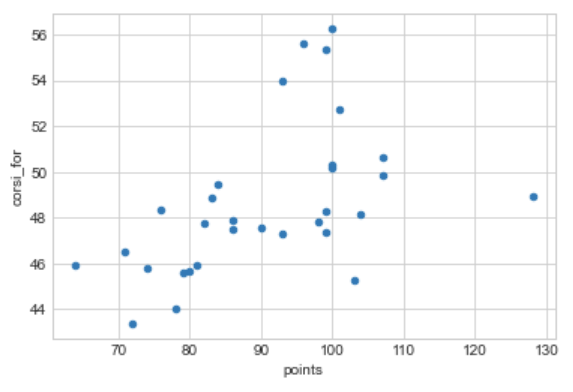

In [3]:
Image("Corsi-points.PNG", width=400, height=400)

If we examine the graph above, there does appear to be a positive relationship between the two, as is demonstrated by the dependent variable `corsi_for` increasing as the independent variable `points` increases. Each point on the scatterplot represents an NHL team in the 18-19 season where the x axis represents the amount of points they ended the season with, and the y-axis representing their overall average of `corsi_for`. The trend of this graph would suggest that there may be a significant relationship between a team's `corsi` and their overall success. That being said, it is interesting to see the outlier Tampa Bay Lightning who had 128 points that season, far more than any other team, had a middling `corsi_for` value.

The next relationship examined was that of a team's average shot distance in terms of how far away the shooting player was from the oppositions net and the total goals for and against for a team. The expectation with regards to these datapoints is that a team that is kept at a further distance from the opposing net will score fewer goals due to the overall shot quality being lower. The inverse, of course, says that a team who is successful at closing the distance between the shooter and the net will perform better.

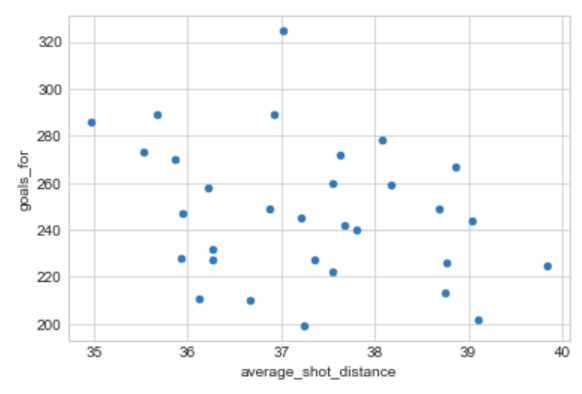

In [4]:
Image("dist-for.PNG", width=400, height=400)

With regards to this model, it's not as easy to say that there exists a significant relationship between a teams average shot distance and the amount of goals scored, though one could argue that there is a marginal downwards trend which aligns with expectations. This could be the case for a multitude of reasons, including opposing goaltenders playing well, or simply the fact that the range between all 31 teams is only about 5 feet, which over 82 games could plainly not be significant enough of a difference to have a worthwhile effect on overall team performance. Overall, it I find that it would be irresponsible to claim any sort of significant relationship between the two variables.

Here is the scatterplot measuring average shot distance and goals against, where the expectation is that in attempting to close the gap, a team may be more susceptible to making mistakes defensively, where the opposing team may have better scoring opportunities

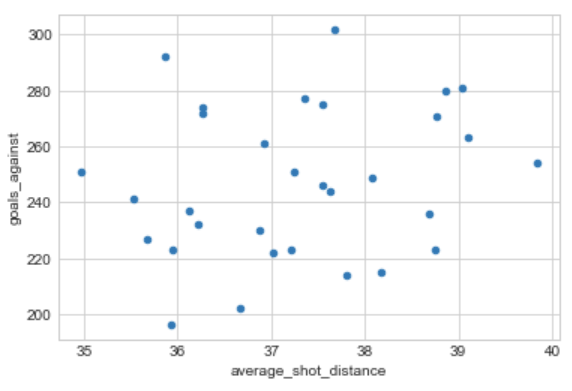

In [5]:
Image("dist-against.PNG", width=400, height=400)

Largely the same story as above, there does not appear to be any significant trend pointing towards a relationship between the two variables.

The final model examined in the scope of this project utilizes the player-centric dataframe. For this, we'll be examining the relationship between the two different player positions, forward and defense, and which shot types they have success using, and how they differ from one another. Generally, there are six commonly used shot-types, where currently the `wrist shot` is heavily utilized to leave opposing goaltenders the least amount of time to prepare for the players shot. In the past, the `slap shot` was a staple of the league, utilized to give the puck the highest velocity possible.

In order to generate a valuable model depicting these datapoints, some data manipulation was necessary. The first step was splitting the two positions into separate dataframes. This was simple enough because Sportradar's API provided positional data. Next, we had to transform the data we had, average goals scored using each shot type on a single-game basis, and convert it to the proportion of total goals scored using each shot type. The procedure to do this was as follows:

1. Aggregate the data of all players, leaving just the mean goals per game for each shot type among each position.
2. Calculate the sum of each shot-type's average goals per game to get the total average goals per game value.
3. Divide each aggregated value by the total average calculated in step 2.

After this, we had two separate dataframes, forwards and defensemen, containing the proportion of each shot-types average goals per game from an individual player. The two dataframes were concatenated such that their column values lined up, and each row had an independent variable of position, and dependent variables of the aforemention shot-goal proportions. The multiple bar plot generated by this dataframe is as follows:

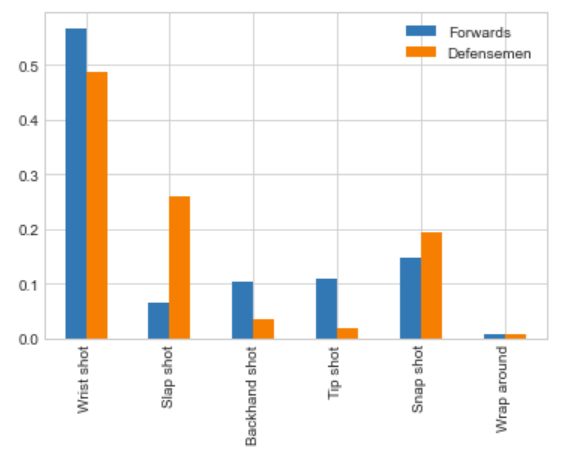

In [6]:
Image("Shot-Type.PNG", width=400, height=400)

Examining this plot, it appears that both forwards and defensemen find the most success using wrist shots, as expected. Though it also indicates that defensemen have a better distribution when it comes to scoring capability of each shot type.

The final thing which I examined in this project was the performance of each shot relative to the amount of goals being scored with it and the amount of shots being taken(calculated in the same manor as proportion of goals scored) using it. The graph below illustrates the proportion of goals scored with each shot type divided by the proportion of shots taken with each shot type:

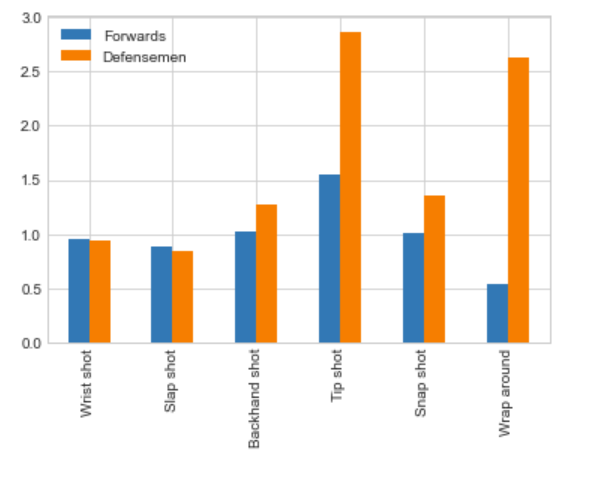

In [7]:
Image("Shot-Type-Performance.PNG", width=400, height=400)

With how the measurements are calculated, a higher number indicates that a shot is being underutilized, and is leading to goals beyond the expected rate given by the frequency of the shot being taken. As may be expected, the heavily emphasized wrist shot and slap shot suffer marginal over-reliancy, and the data suggests that players could benefit from using the other four shot-types more often. The outliers of tipshot and wrap around significantly outperforming expectations for defensemen is unfortunately more a result of less data skewing results as both shots require the shooter to be very close to the net, somewhere that defensemen usually don't reside. Thus, it's likely not as much of a revelation as the graph suggests for those two.

# Conclusions

From the generated models, there may be validity is saying that a team's average `corsi_for` may have a positive relationship with the overall success of the team. The same, however, more than likely cannot be said for a team's average shot distance, neither for the amount of goals scored for nor against.

With regards to individual player statistics, there may be value in looking into the performance of a given shot-type when compared to the amount of goals scored with it vs. the number of shots taken utilizing it.

Still in it's infancy, the realm of hockey analytics poses exciting potential to change the way in which general managers view as meaningful traits in a player, as well as changes in the way the game is coached.